In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer GRU

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete78BFQ5/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete78BFQ5/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete78BFQ5/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset)) # train_dataset.output_shapes
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset)) #test_dataset.output_shapes

In [7]:
model  = tf.keras.Sequential([
                              tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                              tf.keras.layers.Conv1D(128, 5, activation='relu'),
                              tf.keras.layers.GlobalAveragePooling1D(),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 53s 119ms/step - loss: 0.5822 - accuracy: 0.6559 - val_loss: 0.3131 - val_accuracy: 0.8783
Epoch 2/10
391/391 [==============================] - 27s 67ms/step - loss: 0.2255 - accuracy: 0.9185 - val_loss: 0.3023 - val_accuracy: 0.8778
Epoch 3/10
391/391 [==============================] - 25s 61ms/step - loss: 0.1634 - accuracy: 0.9433 - val_loss: 0.3309 - val_accuracy: 0.8738
Epoch 4/10
391/391 [==============================] - 25s 60ms/step - loss: 0.1291 - accuracy: 0.9569 - val_loss: 0.3746 - val_accuracy: 0.8697
Epoch 5/10
391/391 [==============================] - 24s 58ms/step - loss: 0.0993 - accuracy: 0.9681 - val_loss: 0.4231 - val_accuracy: 0.8635
Epoch 6/10
391/391 [==============================] - 24s 57ms/step - loss: 0.0782 - accuracy: 0.9751 - val_loss: 0.4924 - val_accuracy: 0.8588
Epoch 7/10
391/391 [==============================] - 23s 57ms/step - loss: 0.0662 - accuracy: 0.9791 - val_loss: 0.5704 - val_accuracy

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

어느 정도 좋은 성능을 보여주고 있으나, 과적합(overfitting)이 의심됨.

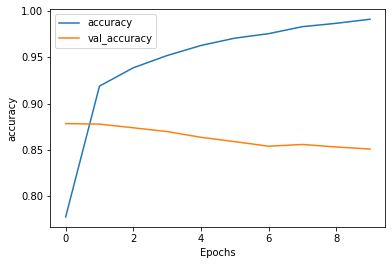

In [13]:
plot_graphs(history, 'accuracy')

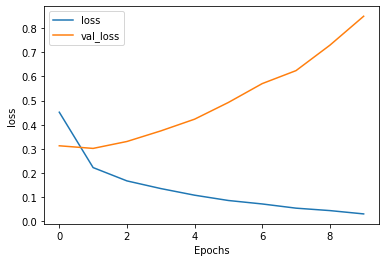

In [14]:
plot_graphs(history, 'loss')